## Exemplo  6 - Detecção de pele com Naïve Bayes

Neste exemplo, vamos utilizar o classificador *Naïve Bayes* para classificar os pixeis de uma imagem como *pele* e *background* ("não-pele"). Um classificador deste tipo poderia ser utilizado como parte de um sistema para detecção de pessoas, detecção de nudez em imagens, etc.

In [1]:
import numpy as np

# Importa o módulo de plotagem
import matplotlib.pyplot as plt

# Configura a matplotlib para operar interativamente no notebook.
# Para detalhes, execute: %matplotlib?
%matplotlib inline

# Configura o tamanho padrão da figura largura X altura, em polegadas
plt.rcParams['figure.figsize'] = (10, 4)

## Naïve Bayes

Aplica o **Teorema de Bayes** de forma *naïve*, isto é, assumindo *independência condicional* entre as características (entre as `n_cols` variáveis).

$P(y \,|\, x_1, x_2, ...., x_n) = \frac{P(x_1, x_2,..., x_n \,|\, y) P(y)}{P(x_1, x_2,..., x_n)}$

Independência entre as características:

$P(x_i \,|\, y, x_1,...x_{i-1}, x_{i+1},... x_n) = P(x_i \,|\, y)$

Daí:

$P(y \,|\, x_1, x_2, ...., x_n) = \frac{P(y) \prod_{i=1}^nP(x_i \,|\, y)}{P(x_1, x_2,..., x_n)}$

A classificação é feita de modo MAP (*maximum a posteriori*):

$\hat{y} = \arg \max_y P(y) \prod_{i=1}^nP(x_i \,|\, y)$

### O conjunto de treinamento

O conjunto de treinamento será obtido de um única imagem no espaço de cor CIE Lab. O espaço CIE Lab tem a vantagem de separar a informação de *luminosidade* (canal $L$) da informação de *cromaticidade* (canais $a$ e $b$), permitindo maior robustez em variações de luminosidade da cena no instante de aquisição da imagem.

In [2]:
from skimage import io, color

In [3]:
I_train_rgb = io.imread('data/skin-training.jpg')
I_train_lab = color.rgb2lab(I_train_rgb)
n_rows, n_cols, n_channels = I_train_lab.shape

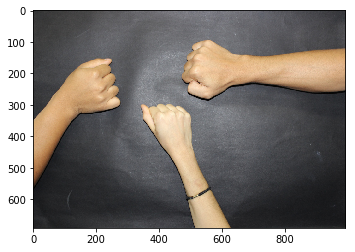

In [4]:
plt.imshow(I_train_rgb)

- A imagem de treinamento provê exemplos sobre um fundo escuro
- Podemos utilizar *limiarização* (*thresholding*) e alguns filtros para obter o conjunto de treinamento

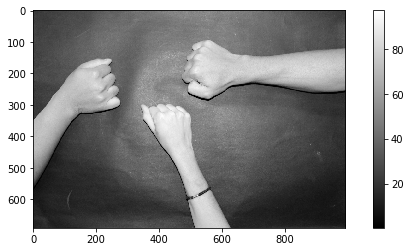

In [5]:
plt.imshow(I_train_lab[:,:,0], cmap=plt.cm.gray)
plt.colorbar()

In [6]:
mask = np.zeros((n_rows, n_cols), dtype=np.bool)
# Selecionar onde o canal de luminância (L) é maior que um limiar
mask[I_train_lab[:,:,0] > 60] = True

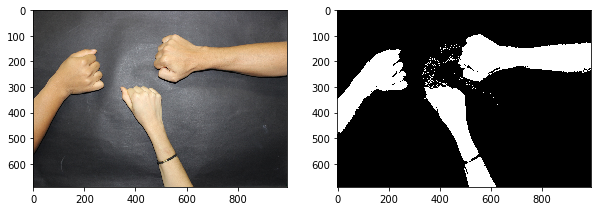

In [7]:
plt.subplot(1,2,1)
plt.imshow(I_train_rgb)
plt.subplot(1,2,2)
plt.imshow(mask, cmap=plt.cm.binary_r)

In [8]:
from skimage.morphology import remove_small_objects
mask = remove_small_objects(mask, min_size=256)

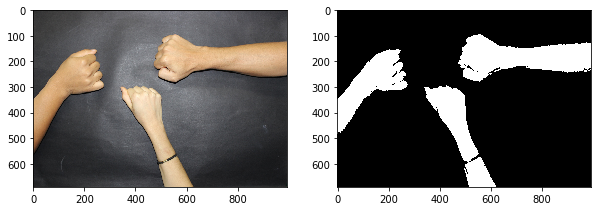

In [9]:
plt.subplot(1,2,1)
plt.imshow(I_train_rgb)
plt.subplot(1,2,2)
plt.imshow(mask, cmap=plt.cm.binary_r)

- A imagem é formatada para $mn$ vetores de características
- Cada vetor é 2-d, contendo os valores dos canais *a* e *b*

In [10]:
X_train = I_train_lab[:, :, 1:].reshape(-1, 2)
X_train

array([[-0.01436165,  1.41092714],
       [-0.01400048,  1.41941755],
       [-0.01400048,  1.41941755],
       ..., 
       [-1.55647165,  1.58594146],
       [-3.53266769,  6.1189439 ],
       [-4.53565161,  9.33492247]])

In [11]:
y_train = mask.reshape(-1)
y_train

array([False, False, False, ..., False, False, False], dtype=bool)

### Treinamento

*Gaussian Naïve Bayes* é implementado na scikit-learn por `GaussianNB`

$P(x_i \,|\, y) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp - \frac{(x_i - \mu)^2}{2\sigma^2}$

In [12]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None)

### Classificação

In [13]:
I_test_rgb = io.imread('data/thiago.jpg')
n_rows, n_cols, n_channels = I_test_rgb.shape
I_test_lab = color.rgb2lab(I_test_rgb)

In [14]:
X_test = I_test_lab[:, :, 1:].reshape(-1, 2)
y_test = gnb.predict(X_test) 
S = y_test.reshape(n_rows, n_cols)

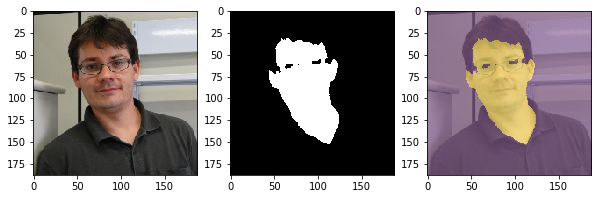

In [15]:
plt.subplot(1,3,1)
plt.imshow(I_test_rgb)
plt.subplot(1,3,2)
plt.imshow(S, cmap=plt.cm.binary_r)
plt.subplot(1,3,3)
plt.imshow(I_test_rgb, alpha=0.6)
plt.imshow(S, cmap=plt.cm.viridis, alpha=0.4)

In [16]:
I_test_rgb = io.imread('data/diversidade.jpg')
n_rows, n_cols, n_channels = I_test_rgb.shape
I_test_lab = color.rgb2lab(I_test_rgb)

In [17]:
X_test = I_test_lab[:, :, 1:].reshape(-1, 2)
y_test = gnb.predict(X_test) 
S = y_test.reshape(n_rows, n_cols)

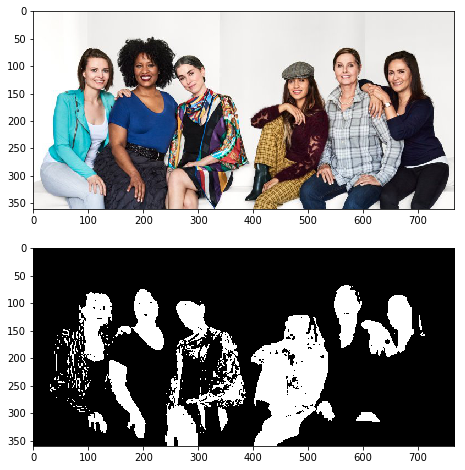

In [18]:
fig = plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.imshow(I_test_rgb)
plt.subplot(2,1,2)
plt.imshow(S, cmap=plt.cm.binary_r)

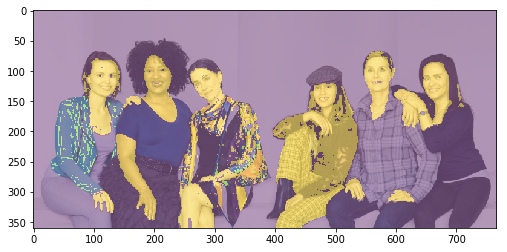

In [19]:
plt.imshow(I_test_rgb, alpha=0.6)
plt.imshow(S, cmap=plt.cm.viridis, alpha=0.4)